<a href="https://colab.research.google.com/github/mayankb-21/machine-learning-lab/blob/main/ml_lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Performance Prediction ML Pipeline

This notebook implements a complete machine learning pipeline to predict student performance.

## 1. Data Loading and Exploration

In [35]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
data = student_performance.data.features
y = student_performance.data.targets

# metadata
print("Metadata:")
print(student_performance.metadata)

# variable information
print("\nVariable Information:")
print(student_performance.variables)

Metadata:
{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Busines

## 2. Data Preprocessing

### 2.1 Handle Missing Values and Categorical Encoding

In [45]:
# Check for missing values
print("Missing values before preprocessing:")
print(data.isnull().sum())

# Identify numerical and categorical features
# Numerical and categorical features will be handled by the ColumnTransformer in the pipeline
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

# Display the first few rows of the original data
print("\nOriginal data:")
display(data.head())

# Check the shape of the original data
print("\nShape of original data:", data.shape)

Missing values before preprocessing:
age                  0
Medu                 0
Fedu                 0
traveltime           0
studytime            0
failures             0
famrel               0
freetime             0
goout                0
Dalc                 0
Walc                 0
health               0
absences             0
school_MS            0
sex_M                0
address_U            0
famsize_LE3          0
Pstatus_T            0
Mjob_health          0
Mjob_other           0
Mjob_services        0
Mjob_teacher         0
Fjob_health          0
Fjob_other           0
Fjob_services        0
Fjob_teacher         0
reason_home          0
reason_other         0
reason_reputation    0
guardian_mother      0
guardian_other       0
schoolsup_yes        0
famsup_yes           0
paid_yes             0
activities_yes       0
nursery_yes          0
higher_yes           0
internet_yes         0
romantic_yes         0
dtype: int64

Original data:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,0,4,3,2,2,...,True,False,True,False,False,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,False,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,False,False,True,True,False,False



Shape of original data: (649, 39)


### 2.2 Create Classification Target

In [37]:
# Define a classification target (e.g., pass if G3 >= 10)
y_classified = (y['G3'] >= 10).astype(int)
print("Classification Target (Pass/Fail):")
display(y_classified.head())

Classification Target (Pass/Fail):


,G3
0,1
1,1
2,1
3,1
4,1


## 3. Splitting the Data

In [46]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
# Use the original data and the classified target
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(data, y_classified, test_size=0.2, random_state=42)

print("Shape of training data:", X_train_clf.shape)
print("Shape of testing data:", X_test_clf.shape)
print("Shape of training target:", y_train_clf.shape)
print("Shape of testing target:", y_test_clf.shape)

Shape of training data: (519, 39)
Shape of testing data: (130, 39)
Shape of training target: (519,)
Shape of testing target: (130,)


## 4. Model Training (Decision Tree and Random Forest Classifiers)

### 4.1 Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify numerical and categorical features from the original data
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create a pipeline with preprocessing and a Decision Tree Classifier
dt_clf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', DecisionTreeClassifier(random_state=42))])

# Train the Decision Tree Classifier model using the original training data
dt_clf_pipeline.fit(X_train_clf, y_train_clf)

print("Decision Tree Classifier trained successfully.")

Decision Tree Classifier trained successfully.


### 4.2 Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline with preprocessing and a Random Forest Classifier
rf_clf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', RandomForestClassifier(random_state=42))])

# Train the Random Forest Classifier model using the original training data
rf_clf_pipeline.fit(X_train_clf, y_train_clf)

print("Random Forest Classifier trained successfully.")

Random Forest Classifier trained successfully.


## 5. Evaluate Classifiers on the Test Set

### 5.1 Decision Tree Classifier Evaluation

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the test set using the pipeline
y_pred_dt_clf = dt_clf_pipeline.predict(X_test_clf)

# Evaluate the classifier
accuracy_dt_clf = accuracy_score(y_test_clf, y_pred_dt_clf)
precision_dt_clf = precision_score(y_test_clf, y_pred_dt_clf)
recall_dt_clf = recall_score(y_test_clf, y_pred_dt_clf)
f1_dt_clf = f1_score(y_test_clf, y_pred_dt_clf)

print(f"Decision Tree Classifier Accuracy: {accuracy_dt_clf}")
print(f"Decision Tree Classifier Precision: {precision_dt_clf}")
print(f"Decision Tree Classifier Recall: {recall_dt_clf}")
print(f"Decision Tree Classifier F1 Score: {f1_dt_clf}")

Decision Tree Classifier Accuracy: 0.823076923076923
Decision Tree Classifier Precision: 0.9181818181818182
Decision Tree Classifier Recall: 0.8782608695652174
Decision Tree Classifier F1 Score: 0.8977777777777778


### 5.2 Random Forest Classifier Evaluation

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the test set using the pipeline
y_pred_rf_clf = rf_clf_pipeline.predict(X_test_clf)

# Evaluate the classifier
accuracy_rf_clf = accuracy_score(y_test_clf, y_pred_rf_clf)
precision_rf_clf = precision_score(y_test_clf, y_pred_rf_clf)
recall_rf_clf = recall_score(y_test_clf, y_pred_rf_clf)
f1_rf_clf = f1_score(y_test_clf, y_pred_rf_clf)

print(f"Random Forest Classifier Accuracy: {accuracy_rf_clf}")
print(f"Random Forest Classifier Precision: {precision_rf_clf}")
print(f"Random Forest Classifier Recall: {recall_rf_clf}")
print(f"Random Forest Classifier F1 Score: {f1_rf_clf}")

Random Forest Classifier Accuracy: 0.8923076923076924
Random Forest Classifier Precision: 0.9105691056910569
Random Forest Classifier Recall: 0.9739130434782609
Random Forest Classifier F1 Score: 0.9411764705882353


## 6. Compare Classifier Performance

In [43]:
import pandas as pd

# Create a DataFrame to compare the metrics
metrics_data_clf = {'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
                    'Decision Tree Classifier': [accuracy_dt_clf, precision_dt_clf, recall_dt_clf, f1_dt_clf],
                    'Random Forest Classifier': [accuracy_rf_clf, precision_rf_clf, recall_rf_clf, f1_rf_clf]}

metrics_df_clf = pd.DataFrame(metrics_data_clf)

print("Classifier Performance Comparison:")
display(metrics_df_clf)

Classifier Performance Comparison:


,Metric,Decision Tree Classifier,Random Forest Classifier
0,Accuracy,0.776923,0.892308
1,Precision,0.905660,0.897638
2,Recall,0.834783,0.991304
3,F1-score,0.868778,0.942149


from matplotlib import pyplot as plt
metrics_df_clf['Decision Tree Classifier'].plot(kind='hist', bins=20, title='Decision Tree Classifier')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics_df_clf['Random Forest Classifier'].plot(kind='hist', bins=20, title='Random Forest Classifier')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
metrics_df_clf.groupby('Metric').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics_df_clf.plot(kind='scatter', x='Decision Tree Classifier', y='Random Forest Classifier', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics_df_clf['Decision Tree Classifier'].plot(kind='line', figsize=(8, 4), title='Decision Tree Classifier')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
metrics_df_clf['Random Forest Classifier'].plot(kind='line', figsize=(8, 4), title='Random Forest Classifier')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(metrics_df_clf['Metric'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(metrics_df_clf, x='Decision Tree Classifier', y='Metric', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(metrics_df_clf['Metric'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(metrics_df_clf, x='Random Forest Classifier', y='Metric', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Decision Tree Classifier'].plot(kind='hist', bins=20, title='Decision Tree Classifier')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Random Forest Classifier'].plot(kind='hist', bins=20, title='Random Forest Classifier')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Metric').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='Decision Tree Classifier', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Decision Tree Classifier', y='Random Forest Classifier', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Decision Tree Classifier']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Metric')):
  _plot_series(series, series_name, i)
  fig.legend(title='Metric', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Decision Tree Classifier')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Random Forest Classifier']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Metric')):
  _plot_series(series, series_name, i)
  fig.legend(title='Metric', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Random Forest Classifier')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Metric')):
  _plot_series(series, series_name, i)
  fig.legend(title='Metric', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Decision Tree Classifier'].plot(kind='line', figsize=(8, 4), title='Decision Tree Classifier')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Random Forest Classifier'].plot(kind='line', figsize=(8, 4), title='Random Forest Classifier')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['Metric'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='index', y='Metric', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Metric'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Decision Tree Classifier', y='Metric', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Metric'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Random Forest Classifier', y='Metric', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## 7. Feature Correlation Analysis

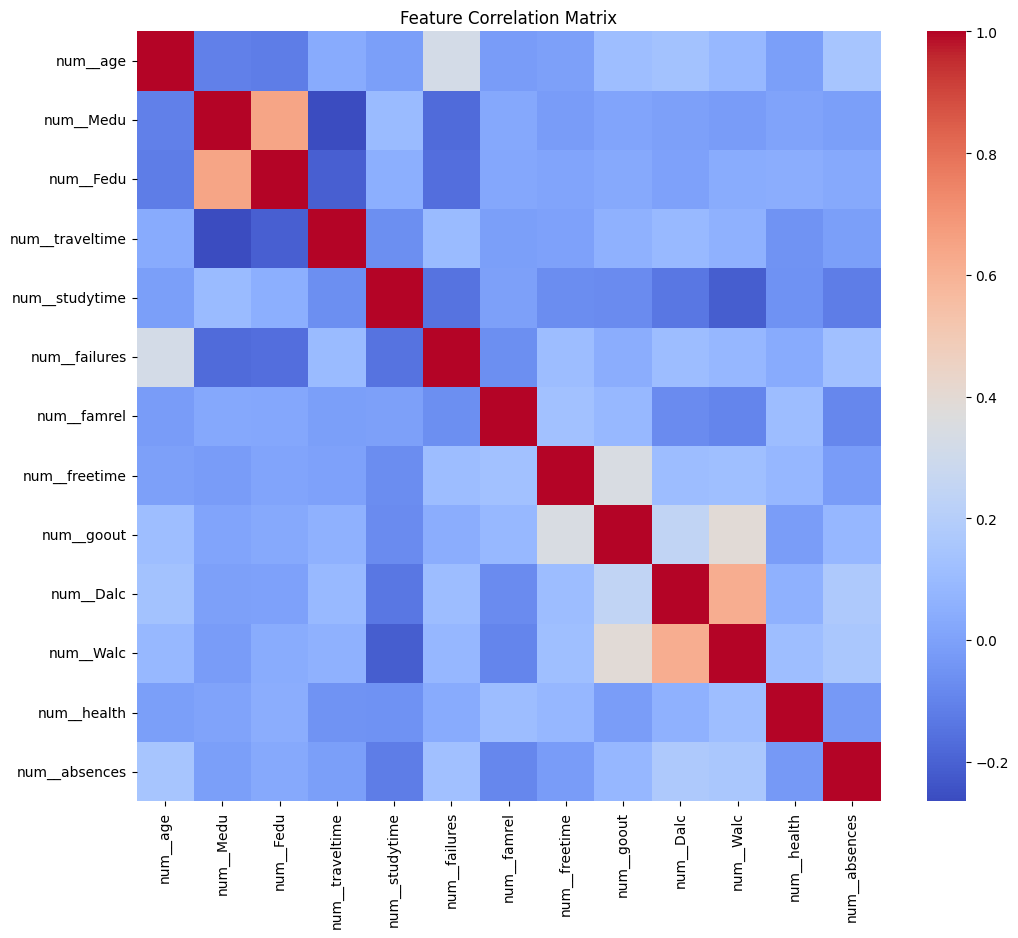

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Use the preprocessor to transform the *original* data for correlation analysis
X_processed_for_corr = preprocessor.fit_transform(data)

# Convert to DataFrame to include column names for better visualization
# Need to handle the case where get_feature_names_out() is not available in older sklearn versions
try:
    feature_names = preprocessor.get_feature_names_out()
except AttributeError:
    # Fallback for older sklearn versions - might not be perfectly accurate
    feature_names = [f'feature_{i}' for i in range(X_processed_for_corr.shape[1])]


X_processed_df = pd.DataFrame(X_processed_for_corr, columns=feature_names)
correlation_matrix = X_processed_df.corr()

# Set the figure size
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)

# Set the title of the heatmap
plt.title('Feature Correlation Matrix')

# Display the heatmap
plt.show()